<a href="https://colab.research.google.com/github/vkaru001/L/blob/main/LPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pytesseract


License Plate Recognition



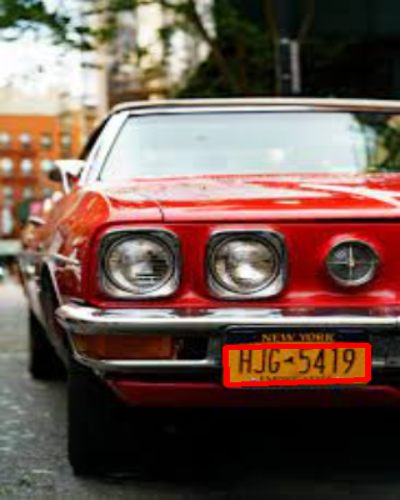

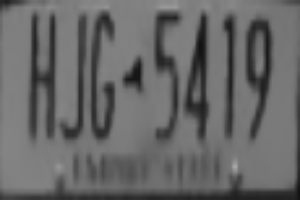

In [ ]:
import numpy as np
import pytesseract
import cv2
import imutils

from google.colab.patches import cv2_imshow
pytesseract.pytesseract.tesseract_cmd = r'/content/tesseract-ocr-w64-setup-5.3.1.20230401.exe'

img = cv2.imread('/content/LPR_Original.jpeg',cv2.IMREAD_COLOR)

img = cv2.resize(img, (320,480) )

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 13, 15, 15)

edged = cv2.Canny(gray, 120, 200)
contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

for c in contours:
  peri = cv2.arcLength(c, True)
  approx = cv2.approxPolyDP(c, 0.018 * peri, True)
  if len(approx) == 4:
    screenCnt = approx
    break

if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)

mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],-1,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)

(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]
img = cv2.resize(img,(400,500))
Cropped = cv2.resize(Cropped,(300,200))
print("License Plate Recognition\n")
cv2_imshow(img)
cv2_imshow(Cropped)
#text = pytesseract.image_to_string(Cropped, config='--psm 11')

#print("Detected license plate Number is:",text)


cv2.waitKey(0)
cv2.destroyAllWindows()
